In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


In [3]:
data_path = Path.cwd().parent / 'data'/ 'iris.data'
data_path.exists()

True

In [4]:
data = pd.read_csv(data_path, header=None)

In [5]:
data.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
y = data.iloc[:,4].values
idx = (y == 'Iris-setosa') | (y == 'Iris-versicolor')
y = y[idx]
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [11]:
X = data.iloc[idx, [0,2]].values

In [9]:
setosa = y == 1
versic = y == -1
X[setosa,0]

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

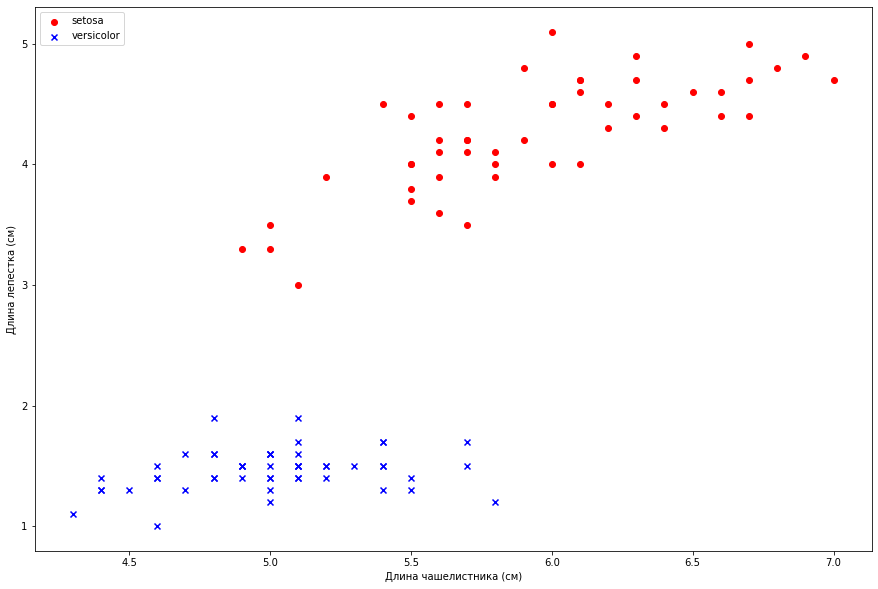

In [8]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(X[setosa,0], X[setosa,1], color='red', marker='o', label='setosa')
ax.scatter(X[versic,0], X[versic,1], color='blue', marker='x', label='versicolor')
plt.xlabel('Длина чашелистника (см)')
plt.ylabel('Длина лепестка (см)')
ax.legend(loc='upper left')

# Теория

 - $x_j^{(i)}$ - значение $j$-ого признака $i$-го образца
 - $w_j$ - вес $j$-ого признака
 - $y^{(i)}$ - (исходная ) разметка $i$-го образца
 - $\hat{y}^{(i)}$ - прогнозная метка 

В векторной форме
 - $\mathbf{x}_j^{(i)}$ - вектор признаков $i$-го образца
 - $\mathbf{w}$ - весовой вектор нейрона
 - $y^{(i)}$ - (исходная ) разметка $i$-го образца
 - $\hat{y}^{(i)}$ - прогнозная метка $i$-го образца

$$\mathbf{x}^{(i)} = \left\| \begin{array}{l} x_1^{(i)} & x_2^{(i)} & \ldots & x_k^{(i)} \end{array} \right\|$$

$$\mathbf{w} = \left\| \begin{array}{l} w_1 & w_2 & \ldots & w_k \end{array} \right\|$$

$w_0$ - смещение (bias unit)

$$\mathbf{x}^{(i)}_{full} = \left\| \begin{array}{l} 1 & x_1^{(i)} & x_2^{(i)} & \ldots & x_k^{(i)} \end{array} \right\|$$

$$\mathbf{w}_{full} = \left\| \begin{array}{l} w_0 & w_1 & w_2 & \ldots & w_k \end{array} \right\|$$

Построим прогноз для $i$-го образца

$$ z^{(i)} = \sum\limits_j x_j^{(i)} w_j + w_0 $$

Пороговая функция 1-го типа
$$ \theta_1(\phi) = \begin{cases} 1 & если ~ \phi \ge 0 \\ -1 & если ~ \phi < 0 \end{cases} $$

Пороговая функция нулевого типа (функция Хэвисайда)
$$ \theta_0(\phi) = \begin{cases} 1 & если ~ \phi \ge 0 \\ 0 & если ~ \phi < 0 \end{cases} $$

Функция активации персептрона Розенблата
$$ \phi(z) = \theta_1(z)$$

Прогнозная метка $i$-го образца
$$ \hat{y}^{(i)} = P(\mathbf{x}^{(i)};\mathbf{w}) = \theta_1(z)$$

Вычисление поправки к весовому вектору
$$ \Delta \mathbf{w} = \eta \left (y^{(i)} - \phi(z^{(i)}) \right) \mathbf{x}^{(i)} $$
$$ \Delta w_0 = \eta \left (y^{(i)} - \phi(z^{(i)}) \right)  $$

Вычисление поправки к весовому вектору для персептрона Розенблата:
$$ \Delta \mathbf{w} = \eta \left (y^{(i)} - \hat{y}^{(i)} \right) \mathbf{x}^{(i)} $$
$$ \Delta w_0 = \eta \left (y^{(i)} - \hat{y}^{(i)} \right)  $$

Вносим поправку в весовой вектор
$$ \mathbf{w} := \mathbf{w} + \Delta \mathbf{w} $$
$$ w_0 := w_0 + \Delta w_0 $$

# Обучение персептрона

In [23]:
from Perceptron import Perceptron

In [24]:
# обучающее отношение примем 0.1
ppn = Perceptron(eta = 0.1, n_iter = 30)
ppn.fit(X,y)

In [25]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)

Text(0, 0.5, 'Количество ошибок')

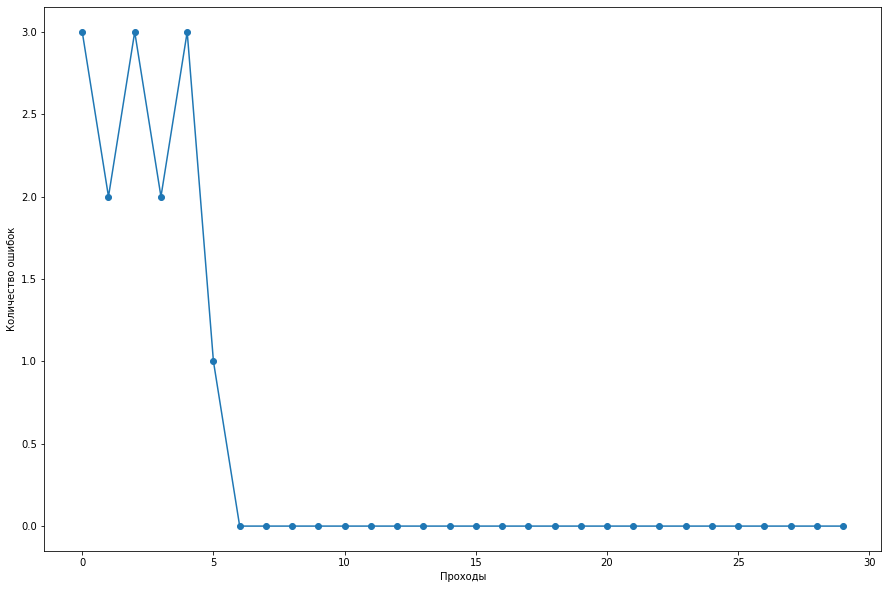

In [26]:
plt.plot(ppn.errors_,marker='o')
plt.xlabel('Проходы')
plt.ylabel('Количество ошибок')

Text(0, 0.5, 'Количество ошибок')

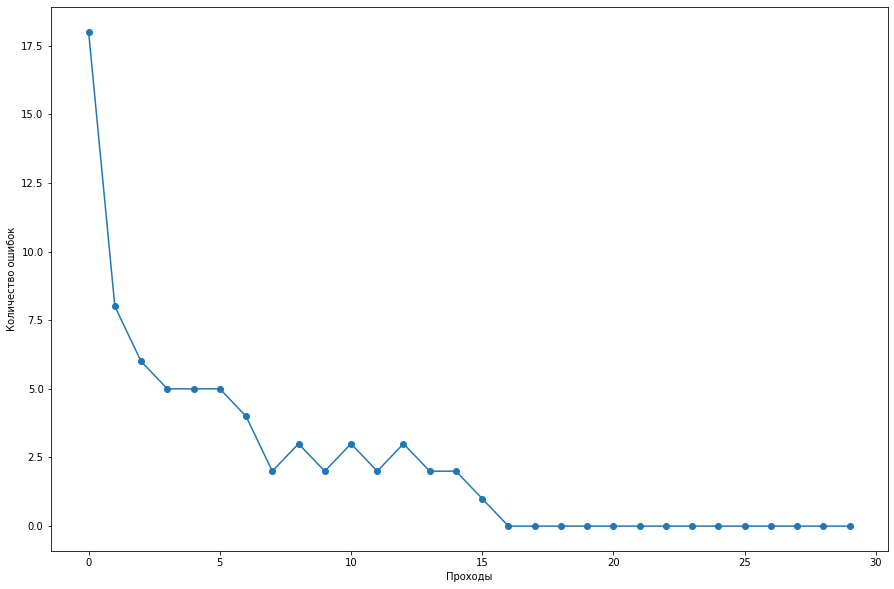

In [27]:
# обучающее отношение примем 0.01
ppn = Perceptron(eta = 0.01, n_iter = 30)
ppn.fit(X,y)

plt.plot(ppn.errors_,marker='o')
plt.xlabel('Проходы')
plt.ylabel('Количество ошибок')

In [28]:
from Regions import plot_decision_regions

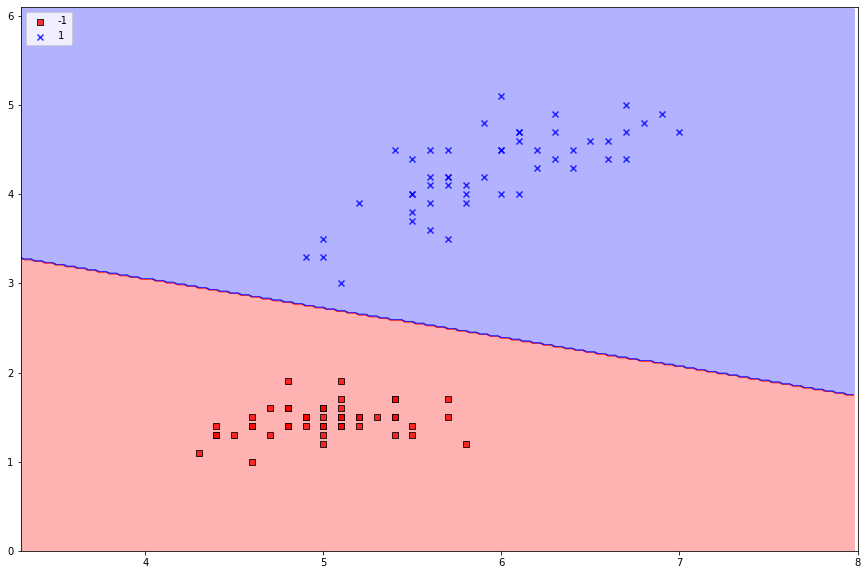

In [29]:
plot_decision_regions(X, y, ppn)
plt.legend(loc = 'upper left')

# Задание
1. Создать и обучить персептрон при других значениях `random_seed`
2. Создать и обучить персептрон для образцов setosa и virginica
3. Создать и обучить персептрон, выбрав другую пару признаков.
4. Изобразить области решений и выяснить, подтверждается ли предположение о линейной разделимости областей решений персептрона.